# Exploring Beat Frequencies using the `Audio` Object

This example uses the `Audio` object and Matplotlib to explore the phenomenon of beat frequencies.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from IPython.html.widgets import interactive
from IPython.display import Audio, display
import numpy as np

/Users/bob/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### Step 1: Beat Frequency Function

(200, 820, 620)


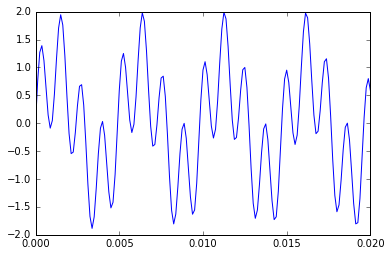

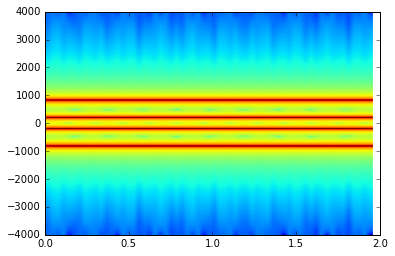

In [3]:
def beat_freq(f1=220.0, f2=224.0):
    max_time = 2
    rate = 8000
    times = np.linspace(0,max_time,rate*max_time)
    signal = np.sin(2*np.pi*f1*times) + np.sin(2*np.pi*f2*times)
    plt.plot(times,signal)
    plt.xlim([0,0.02])
    print(f1, f2, abs(f1-f2))
    display(Audio(data=signal, rate=rate))
    plt.figure(2)
    Pxx, freqs, bins, im = plt.specgram(signal, 
                                        NFFT=512, 
                                        Fs=rate, 
                                        noverlap=512/2,
                                        sides='twosided')

    return signal

beat_freq(200,820);

(216.7, 272.6, 55.900000000000034)


array([ 0.        ,  0.38186648,  0.74913377, ...,  1.5610261 ,
        1.58000688,  1.53884177])

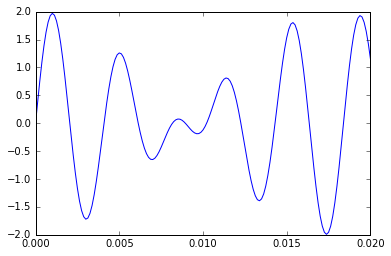

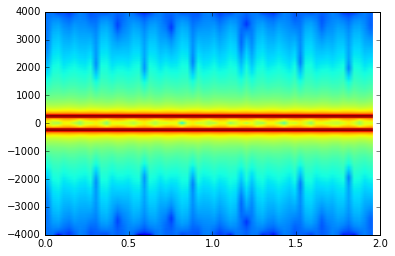

In [4]:
interactive(beat_freq, f1=(200.0,300.0), f2=(200.0,300.0))


### Step 2: DTMF Encoder

In [6]:
# Define Frequencies
rows = [697,770,852,941]
cols = [1209,1336,1477]
key_pad = np.array([[1,2,3],[4,5,6],[7,8,9],[-1,0,-1]])


def play_key(key_num,duration=1):
    samp_rate = 8000
    f1 = rows[np.where(key_pad==key_num)[0]]
    f2 = cols[np.where(key_pad==key_num)[1]]
    print key_num, f1, f2
    t = np.linspace(0,duration,duration*samp_rate)
    signal = np.cos(2*np.pi*f1*t)+np.cos(2*np.pi*f2*t)
    display(Audio(data=signal, rate=samp_rate,autoplay=True))

play_key(8)

8 852 1336


/Users/bob/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/bob/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


### Step 3: Make DTMF Encoder Interactive

In [7]:
# Fill in the blanks below to make an interactive widget
interactive(play_key,key_num = (0,9),duration = (0.0,1.0))

4 770 1209


/Users/bob/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/bob/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


### Step 4: Play Jenny's Number
Hint: sleep after each keep press using:
```
import time
time.sleep(1.1)
```

In [8]:
import time
# Create a list of digits in Jenny's number
list_of_nums = [8,6,7,5,3,0,9]

# Loop through list calling play_key for each element
for key_num in list_of_nums:
    play_key(key_num)
    time.sleep(1.1)
# sleep after each iteration


8 852 1336


/Users/bob/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/bob/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


6 770 1477


7 852 1209


5 770 1336


3 697 1477


0 941 1336


9 852 1477


### Step 4: Play Chirp As Audio

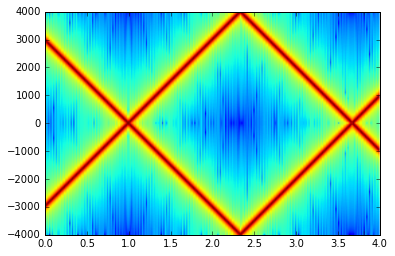

In [9]:
def play_chirp(slope = 100,
               intercept = 500,
               duration = 2,
               samp_rate = 8000):
    
    t = np.linspace(0,duration,duration*samp_rate)
    
    signal = np.cos(2*np.pi*(slope/2*t**2 + intercept*t))
    
    plt.figure(1)
    
    NFFT = 256       # the length of the windowing segments
    Pxx, freqs, bins, im = plt.specgram(signal, 
                                        NFFT=NFFT, 
                                        Fs=samp_rate, 
                                        noverlap=NFFT/2,
                                        sides='twosided')
    display(Audio(data=signal, rate=samp_rate,autoplay=True))
    
play_chirp(-3000,3000,duration = 4)

### Step 5: Make Chrip Interactive

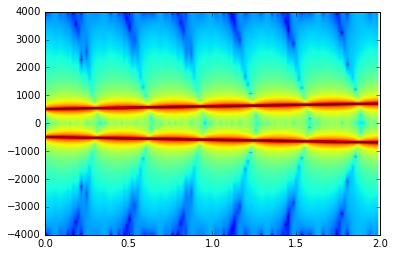

In [10]:
# Fill in the blanks below to make an interactive widget
interactive(play_chirp,slope=(-500,500),intercept=(400,3000))